In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import geopandas as gpd
import math 


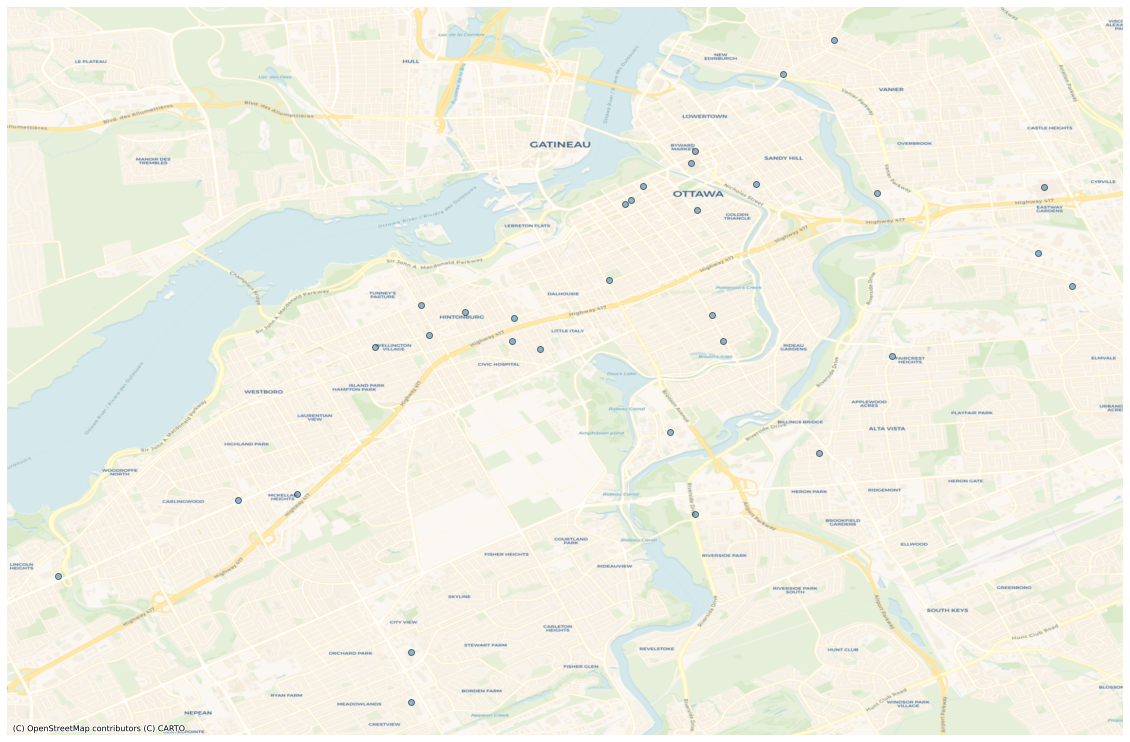

In [2]:
import contextily as ctx
df = pd.read_csv("gymdata.csv")
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["long"], df["lat"]))
df.crs = {'init':'epsg:4326'}
#df = df.to_crs(epsg=3857)
ax = df.plot(figsize=(20,20), alpha=0.5, edgecolor="k")
ctx.add_basemap(ax, zoom=14,crs="epsg:4326", source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

In [3]:
df.head()

,name,lat,long,rating,numrating,size,geometry
0,GoodLife Fitness Ottawa Lansdowne Park,45.399525,-75.686744,4.2,234,3,POINT (-75.68674 45.39952)
1,Free Form Fitness Glebe,45.403247,-75.688428,4.8,26,1,POINT (-75.68843 45.40325)
2,Trueform Health and Fitness,45.402911,-75.717543,4.6,25,1,POINT (-75.71754 45.40291)
3,Elgin Fitness,45.418682,-75.690598,4.6,46,2,POINT (-75.69060 45.41868)
4,Anytime Fitness,45.427406,-75.690818,4.3,83,2,POINT (-75.69082 45.42741)


In [4]:
# Editing the size column so that it works for circle size
df = df.rename(columns={"size ":"s"})
sz = []
for i in range(len(df)):
    sz.append(float(df.iloc[i]["s"] + 1))

In [5]:
import folium 
from folium import Choropleth, Marker
from folium.plugins import HeatMap

def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

m_2 = folium.Map(location=[45.40,-75.69], zoom_start=12)

ott = gpd.read_file("ottawa.geojson")
pop = pd.DataFrame(ott)
pop = pop.sort_values(by=['POPEST'])

Choropleth(geo_data=ott,
           name="choropleth",
           data=pop,
           columns=["Name","POPEST"],
           fill_color='YlGnBu',
           key_on="feature.properties.Name",
           fill_opacity=0.7,
           line_opacity=0.2,
           legend_name="Population Estimate"
          ).add_to(m_2)

for i in range(0,len(df)):
    folium.Circle(
        location=[df.iloc[i]['lat'], df.iloc[i]['long']],
        tooltip=df.iloc[i]['name'],
        fill=True,
        radius=sz[i]*150).add_to(m_2)
    #Marker([df.iloc[i]['lat'], df.iloc[i]['long']], popup=df.iloc[i]['name']).add_to(m_2)

In [6]:
embed_map(m_2, 'q_2.html')

In [9]:
#m_3 = folium.Map(location=[45.40,-75.69], zoom_start=12)

#coverage = ott.geometry.buffer(100)
#coverage = coverage.to_crs(epsg=4326)
#folium.GeoJson(coverage.geometry).add_to(m_3)



In [8]:
#embed_map(m_3, 'm_3.html')